##### Name - Shunottara Alhat

# Assignment 17 - Q2 - Prepare a classification model using SVM for salary data (Salary Data)


##### Import Libraries 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
sns.set_style('darkgrid')

from matplotlib.colors import ListedColormap
from dataprep.eda import plot, create_report
import scipy.stats as stat
from collections import Counter
import dataprep
from sklearn.svm import SVC
from tqdm.notebook import tqdm_notebook
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from dataprep.eda import plot, plot_correlation, plot_missing, create_report
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score

import warnings
warnings.filterwarnings('ignore')

##### Import Data 

In [3]:
SalaryTrain = pd.read_csv("SalaryData_Train(1).csv")
SalaryTrain.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

In [4]:
SalaryTest = pd.read_csv("SalaryData_Test(1).csv")
SalaryTest.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

###  Merging Salary Train and Test Data 

In [5]:
S_TrainTest = SalaryTrain.append(SalaryTest)
S_TrainTest.reset_index(inplace=True,drop=True)
S_TrainTest

age          workclass   education  educationno        maritalstatus  \
0       39          State-gov   Bachelors           13        Never-married   
1       50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2       38            Private     HS-grad            9             Divorced   
3       53            Private        11th            7   Married-civ-spouse   
4       28            Private   Bachelors           13   Married-civ-spouse   
...    ...                ...         ...          ...                  ...   
45216   33            Private   Bachelors           13        Never-married   
45217   39            Private   Bachelors           13             Divorced   
45218   38            Private   Bachelors           13   Married-civ-spouse   
45219   44            Private   Bachelors           13             Divorced   
45220   35       Self-emp-inc   Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0            Adm-clerical   Not-in-family                White     Male   
1         Exec-managerial         Husband                White     Male   
2       Handlers-cleaners   Not-in-family                White     Male   
3       Handlers-cleaners         Husband                Black     Male   
4          Prof-specialty            Wife                Black   Female   
...                   ...             ...                  ...      ...   
45216      Prof-specialty       Own-child                White     Male   
45217      Prof-specialty   Not-in-family                White   Female   
45218      Prof-specialty         Husband                White     Male   
45219        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
45220     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0             2174            0            40   United-States   <=50K  
1                0            0            13   United-States   <=50K  
2                0            0            40   United-States   <=50K  
3                0            0            40   United-States   <=50K  
4                0            0            40            Cuba   <=50K  
...            ...          ...           ...             ...     ...  
45216            0            0            40   United-States   <=50K  
45217            0            0            36   United-States   <=50K  
45218            0            0            50   United-States   <=50K  
45219         5455            0            40   United-States   <=50K  
45220            0            0            60   United-States    >50K  

[45221 rows x 14 columns]

### Exploratory Data Analysis 

In [6]:
# print shape of dataset with rows and columns
print(S_TrainTest.shape)

(45221, 14)


### Descriptive 

In [7]:
S_TrainTest.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  45221.000000  45221.000000  45221.000000  45221.000000  45221.000000
mean      38.548086     10.118463   1101.454700     88.548617     40.938038
std       13.217981      2.552909   7506.511295    404.838249     12.007640
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000

In [8]:
# Info
S_TrainTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [9]:
# Missing Values
S_TrainTest.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
# Duplictes
S_TrainTest.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45216    False
45217    False
45218     True
45219    False
45220    False
Length: 45221, dtype: bool

#### Numerical Variables 

In [11]:
# List of Numerical Variables
numerical_features=[feature for feature in S_TrainTest.columns if S_TrainTest[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
S_TrainTest[numerical_features].head()

Number of numerical variables: 5


age  educationno  capitalgain  capitalloss  hoursperweek
0   39           13         2174            0            40
1   50           13            0            0            13
2   38            9            0            0            40
3   53            7            0            0            40
4   28           13            0            0            40

In [12]:
discrete_feature=[feature for feature in numerical_features if len(S_TrainTest[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 1


#### Continuous Variable 

In [13]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


#### Categorial Variables 

In [14]:
# find categorical variables

categorical = [var for var in S_TrainTest.columns if S_TrainTest[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [15]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(S_TrainTest[var].value_counts())

 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64
 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64
 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales           

In [16]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(S_TrainTest[var].value_counts()/np.float(len(S_TrainTest)))

 Private             0.736516
 Self-emp-not-inc    0.083943
 Local-gov           0.068552
 State-gov           0.043033
 Self-emp-inc        0.036399
 Federal-gov         0.031092
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.326906
 Some-college    0.218881
 Bachelors       0.167400
 Masters         0.055594
 Assoc-voc       0.043321
 11th            0.035802
 Assoc-acdm      0.033325
 10th            0.027045
 7th-8th         0.018200
 Prof-school     0.017359
 9th             0.014949
 12th            0.012760
 Doctorate       0.012030
 5th-6th         0.009929
 1st-4th         0.004909
 Preschool       0.001592
Name: education, dtype: float64
 Married-civ-spouse       0.465602
 Never-married            0.322793
 Divorced                 0.139249
 Separated                0.031202
 Widowed                  0.028239
 Married-spouse-absent    0.012207
 Married-AF-spouse        0.000708
Name: maritalstatus, dtype: float64
 Craft-repair         0.13312

In [17]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(S_TrainTest[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


##### Correlation 

In [18]:
S_TrainTest.corr()

age  educationno  capitalgain  capitalloss  hoursperweek
age           1.000000     0.037623     0.079682     0.059426      0.101992
educationno   0.037623     1.000000     0.126907     0.081741      0.146206
capitalgain   0.079682     0.126907     1.000000    -0.032095      0.083880
capitalloss   0.059426     0.081741    -0.032095     1.000000      0.054220
hoursperweek  0.101992     0.146206     0.083880     0.054220      1.000000

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'educationno'),
  Text(2.5, 0, 'capitalgain'),
  Text(3.5, 0, 'capitalloss'),
  Text(4.5, 0, 'hoursperweek')])

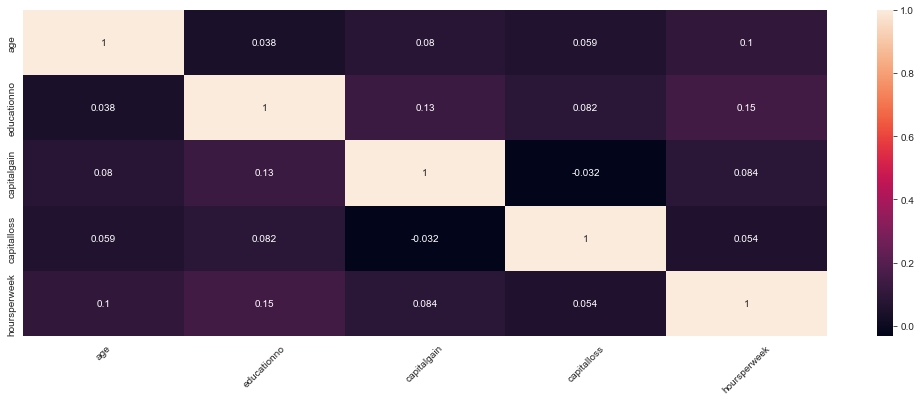

In [19]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(S_TrainTest.corr(), annot=True);
plt.xticks(rotation=45)

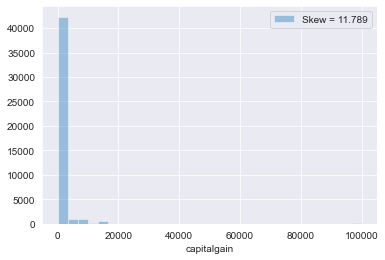

In [20]:
for feat in continuous_feature:
    skew = S_TrainTest[feat].skew()
    sns.distplot(S_TrainTest[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [21]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(S_TrainTest[continuous_feature]))))

The dataset contains 29 observations with more than 2 outliers


In [22]:
continuous_feature

['age', 'capitalgain', 'capitalloss', 'hoursperweek']

#### Outliers Detection 

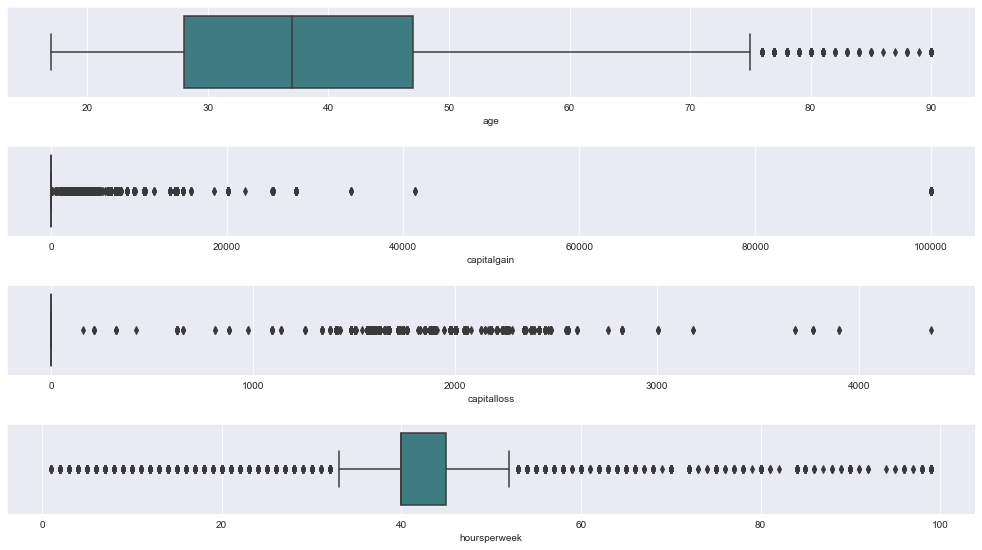

In [23]:
ot = S_TrainTest.copy() 
fig, axes=plt.subplots(4,1,figsize=(14,8),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=ot,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

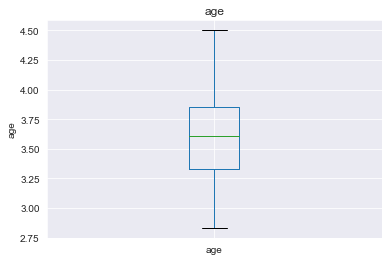

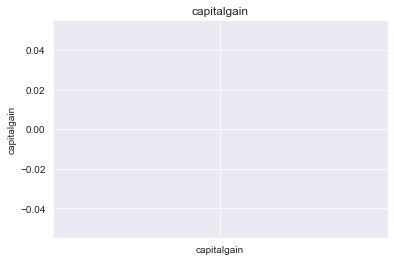

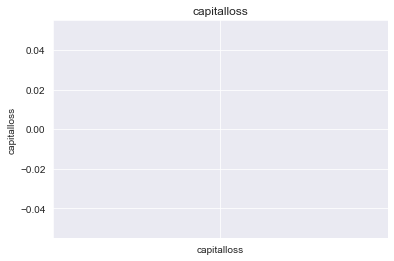

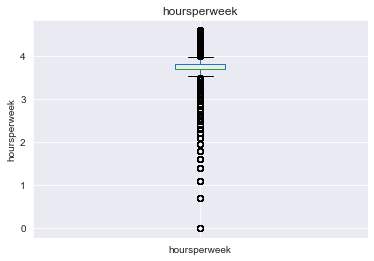

In [24]:
# After Log-Transformation

for feature in continuous_feature:
    Data = S_TrainTest.copy()
    Data[feature]=np.log(Data[feature])
    Data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### Visualize the distribution of 'age' and 'hoursperweek' 

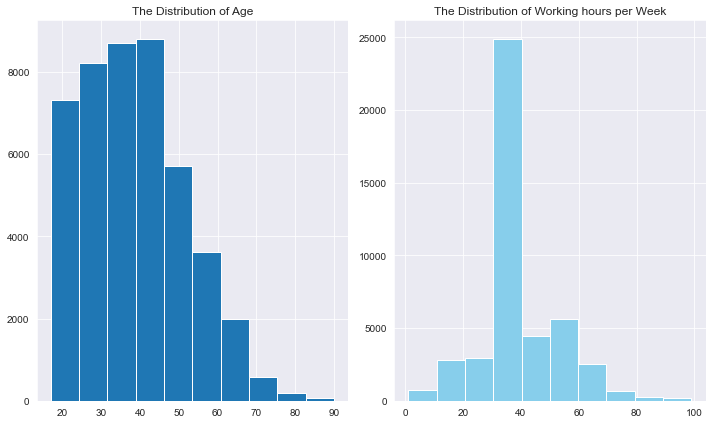

In [25]:
Dist_Age_Balance = plt.figure(figsize = (10,6))

ra1 = Dist_Age_Balance.add_subplot(1,2,1) 
ra2 = Dist_Age_Balance.add_subplot(1,2,2)

ra1.hist(S_TrainTest['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(S_TrainTest['hoursperweek'], color = 'skyblue')
ra2.set_title('The Distribution of Working hours per Week')

plt.tight_layout() 
plt.show()

In [26]:
S_TrainTest[['age','hoursperweek']].describe()

age  hoursperweek
count  45221.000000  45221.000000
mean      38.548086     40.938038
std       13.217981     12.007640
min       17.000000      1.000000
25%       28.000000     40.000000
50%       37.000000     40.000000
75%       47.000000     45.000000
max       90.000000     99.000000

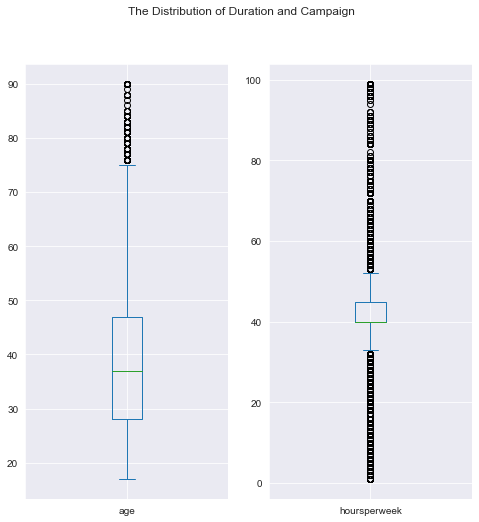

In [27]:
# Change the unit of 'duration' from seconds to minutes
df1 = S_TrainTest.copy()
df1[['age','hoursperweek']].plot(kind = 'box', figsize = (8,8),subplots = True, layout = (1,2),sharex = False, 
                                 sharey = False,title='The Distribution of Duration and Campaign')
plt.show()


##### Now let's look how numerical columns affect Salary. 

In [29]:
#age and salary

b_df = pd.DataFrame()
b_df['age_wrt_salary_more_than_50k'] = (S_TrainTest[S_TrainTest['Salary'] == ' <=50K'][['Salary','age']].describe())['age']
b_df['age_wrt_salary_less_than_50k'] = (S_TrainTest[S_TrainTest['Salary'] == ' >50K'][['Salary','age']].describe())['age']

b_df

age_wrt_salary_more_than_50k  age_wrt_salary_less_than_50k
count                  34013.000000                  11208.000000
mean                      36.749566                     44.006067
std                       13.564858                     10.340502
min                       17.000000                     19.000000
25%                       26.000000                     36.000000
50%                       34.000000                     43.000000
75%                       46.000000                     51.000000
max                       90.000000                     90.000000

<AxesSubplot:title={'center':'Age and Salary statistics'}>

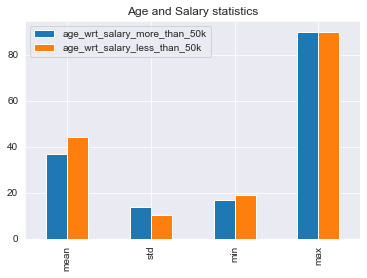

In [30]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and Salary statistics')

In [31]:
#capitalgain and salary

a_df = pd.DataFrame()
a_df['capitalgain_wrt_salary_more_than_50k'] = (S_TrainTest[S_TrainTest['Salary'] == ' <=50K'][['Salary','capitalgain']].
                                                describe())['capitalgain']
a_df['capitalgain_wrt_salary_less_than_50k'] = (S_TrainTest[S_TrainTest['Salary'] == ' >50K'][['Salary','capitalgain']].
                                                describe())['capitalgain']

a_df

capitalgain_wrt_salary_more_than_50k  \
count                          34013.000000   
mean                             149.027783   
std                              927.460669   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                0.000000   
max                            41310.000000   

       capitalgain_wrt_salary_less_than_50k  
count                          11208.000000  
mean                            3991.791667  
std                            14616.543746  
min                                0.000000  
25%                                0.000000  
50%                                0.000000  
75%                                0.000000  
max                            99999.000000

<AxesSubplot:title={'center':'Capital Gain and Salary statistics'}>

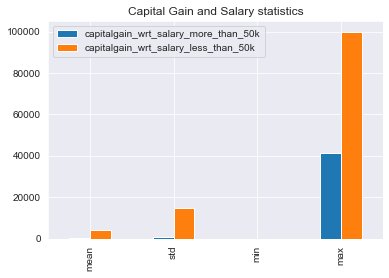

In [32]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Capital Gain and Salary statistics')

In [33]:
#capitalloss and deposit
c_df = pd.DataFrame()
c_df['capitalloss_wrt_salary_more_than_50k'] = (S_TrainTest[S_TrainTest['Salary'] == ' <=50K'][['Salary','capitalloss']].
                                                describe())['capitalloss']
c_df['capitalloss_wrt_salary_less_than_50k'] = (S_TrainTest[S_TrainTest['Salary'] == ' >50K'][['Salary','capitalloss']].
                                                describe())['capitalloss']

c_df

capitalloss_wrt_salary_more_than_50k  \
count                          34013.000000   
mean                              53.969188   
std                              312.007128   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                0.000000   
max                             4356.000000   

       capitalloss_wrt_salary_less_than_50k  
count                          11208.000000  
mean                             193.487063  
std                              592.642319  
min                                0.000000  
25%                                0.000000  
50%                                0.000000  
75%                                0.000000  
max                             3683.000000

In [34]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Capital Loss and Salary statistics')

<AxesSubplot:title={'center':'Capital Loss and Salary statistics'}>

In [35]:
#hoursperweek and deposit
p_df = pd.DataFrame()
p_df['hoursperweek_wrt_salary_more_than_50k'] = (S_TrainTest[S_TrainTest['Salary'] == ' <=50K'][['Salary','hoursperweek']].
                                                 describe())['hoursperweek']
p_df['hoursperweek_wrt_salary_less_than_50k'] = (S_TrainTest[S_TrainTest['Salary'] == ' >50K'][['Salary','hoursperweek']].
                                                 describe())['hoursperweek']

p_df

hoursperweek_wrt_salary_more_than_50k  \
count                           34013.000000   
mean                               39.372005   
std                                11.974303   
min                                 1.000000   
25%                                37.000000   
50%                                40.000000   
75%                                40.000000   
max                                99.000000   

       hoursperweek_wrt_salary_less_than_50k  
count                           11208.000000  
mean                               45.690489  
std                                10.797764  
min                                 1.000000  
25%                                40.000000  
50%                                40.000000  
75%                                50.000000  
max                                99.000000

<AxesSubplot:title={'center':'Working Hours per Week and Salary statistics'}>

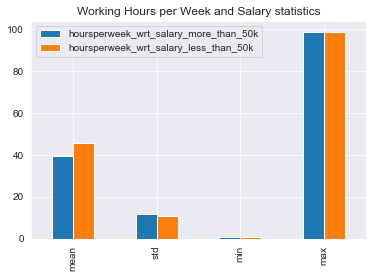

In [36]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Working Hours per Week and Salary statistics')

### Categorical Variables 

In [37]:
categorical_features=[feature for feature in S_TrainTest.columns if S_TrainTest[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
S_TrainTest[categorical_features].head()

Number of Categorical Features: 9 
 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


workclass   education        maritalstatus          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex          native  Salary  
0   Not-in-family   White     Male   United-States   <=50K  
1         Husband   White     Male   United-States   <=50K  
2   Not-in-family   White     Male   United-States   <=50K  
3         Husband   Black     Male   United-States   <=50K  
4            Wife   Black   Female            Cuba   <=50K

In [38]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(S_TrainTest[feature].unique()),feature))

7 number of unique categories in feature named workclass
16 number of unique categories in feature named education
7 number of unique categories in feature named maritalstatus
14 number of unique categories in feature named occupation
6 number of unique categories in feature named relationship
5 number of unique categories in feature named race
2 number of unique categories in feature named sex
40 number of unique categories in feature named native
2 number of unique categories in feature named Salary


In [39]:
# Decide which categorical variables you want to use in model
for feature in S_TrainTest.columns:
    if S_TrainTest[feature].dtypes == 'object':# in pandas it is object
        unique_cat = len(S_TrainTest[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(S_TrainTest[feature].value_counts())
        print()

Feature 'workclass' has 7 unique categories
 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64

Feature 'education' has 16 unique categories
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64

Feature 'maritalstatus' has 7 unique categories
 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus,

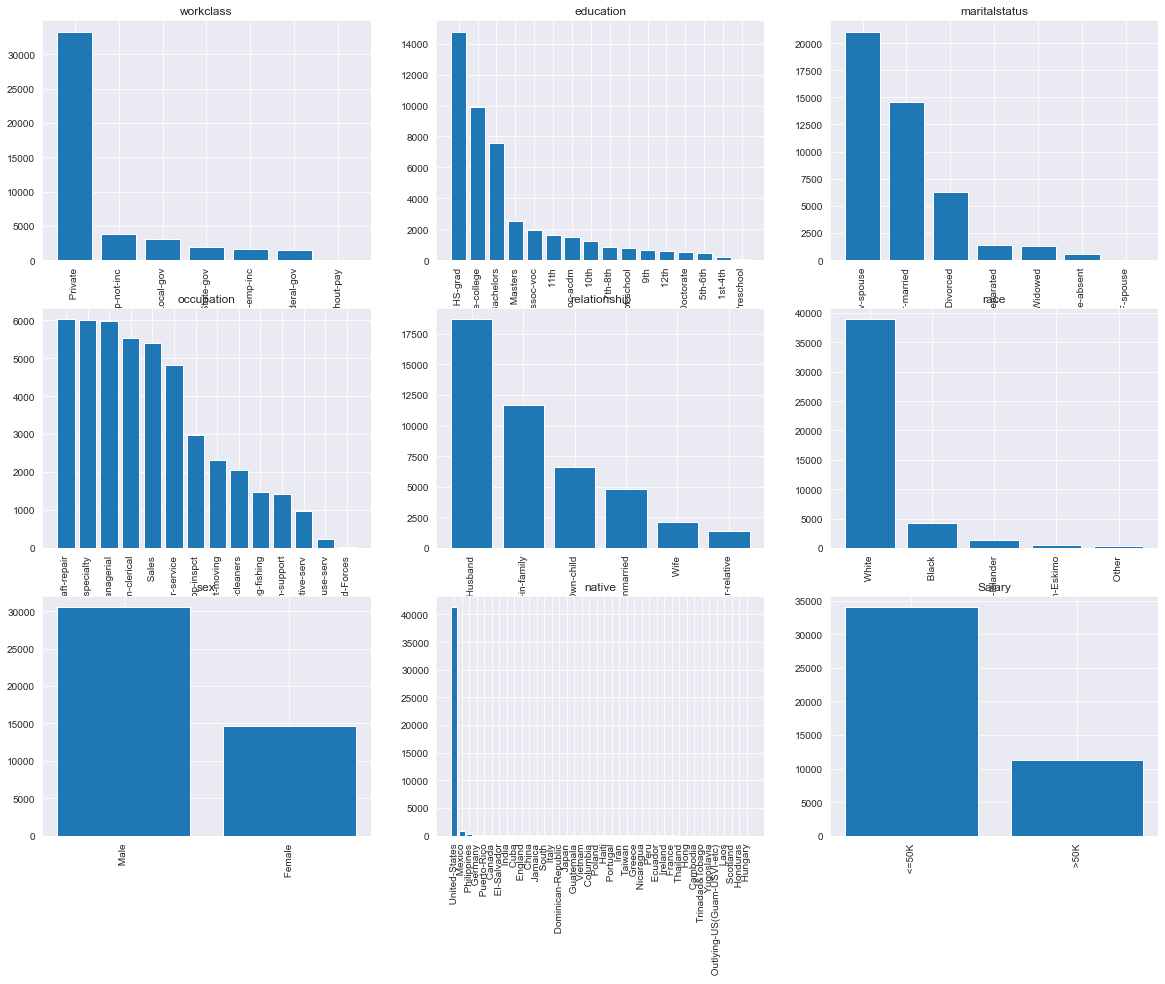

In [40]:
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in categorical_features:
    value_counts = S_TrainTest[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

#### Bar plot for all categorical variables in the dataset 

In [41]:
pal = sns.color_palette('rainbow')
sns.countplot(x='workclass', data= S_TrainTest, palette = pal, 
              order=S_TrainTest['workclass'].value_counts().index, );
plt.xticks(rotation = 90,fontsize = 12)
plt.title('Working Class')

Text(0.5, 1.0, 'Working Class')

Text(0.5, 1.0, 'Education')

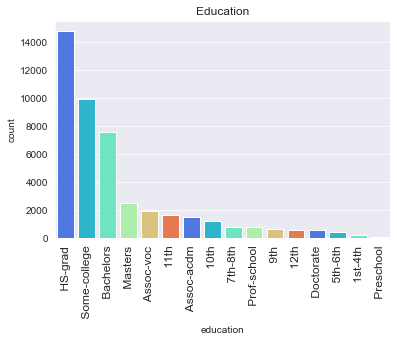

In [42]:
sns.countplot(x='education', data= S_TrainTest, palette = pal, 
              order= S_TrainTest['education'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Education')

Text(0.5, 1.0, 'Relationship')

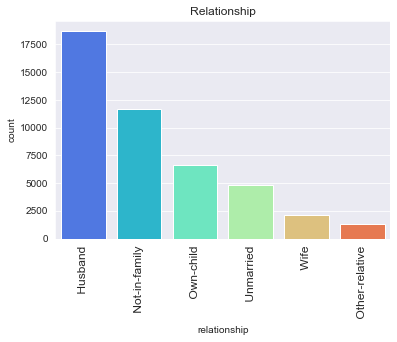

In [43]:
sns.countplot(x='relationship', data=S_TrainTest, palette = pal, 
              order=S_TrainTest['relationship'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Relationship')

In [44]:
sns.countplot(x='sex', data=S_TrainTest, palette = pal, 
              order=S_TrainTest['sex'].value_counts().index)
plt.xticks(fontsize = 12,rotation=90)
plt.title('Sex')

Text(0.5, 1.0, 'Sex')

Text(0.5, 1.0, 'Native')

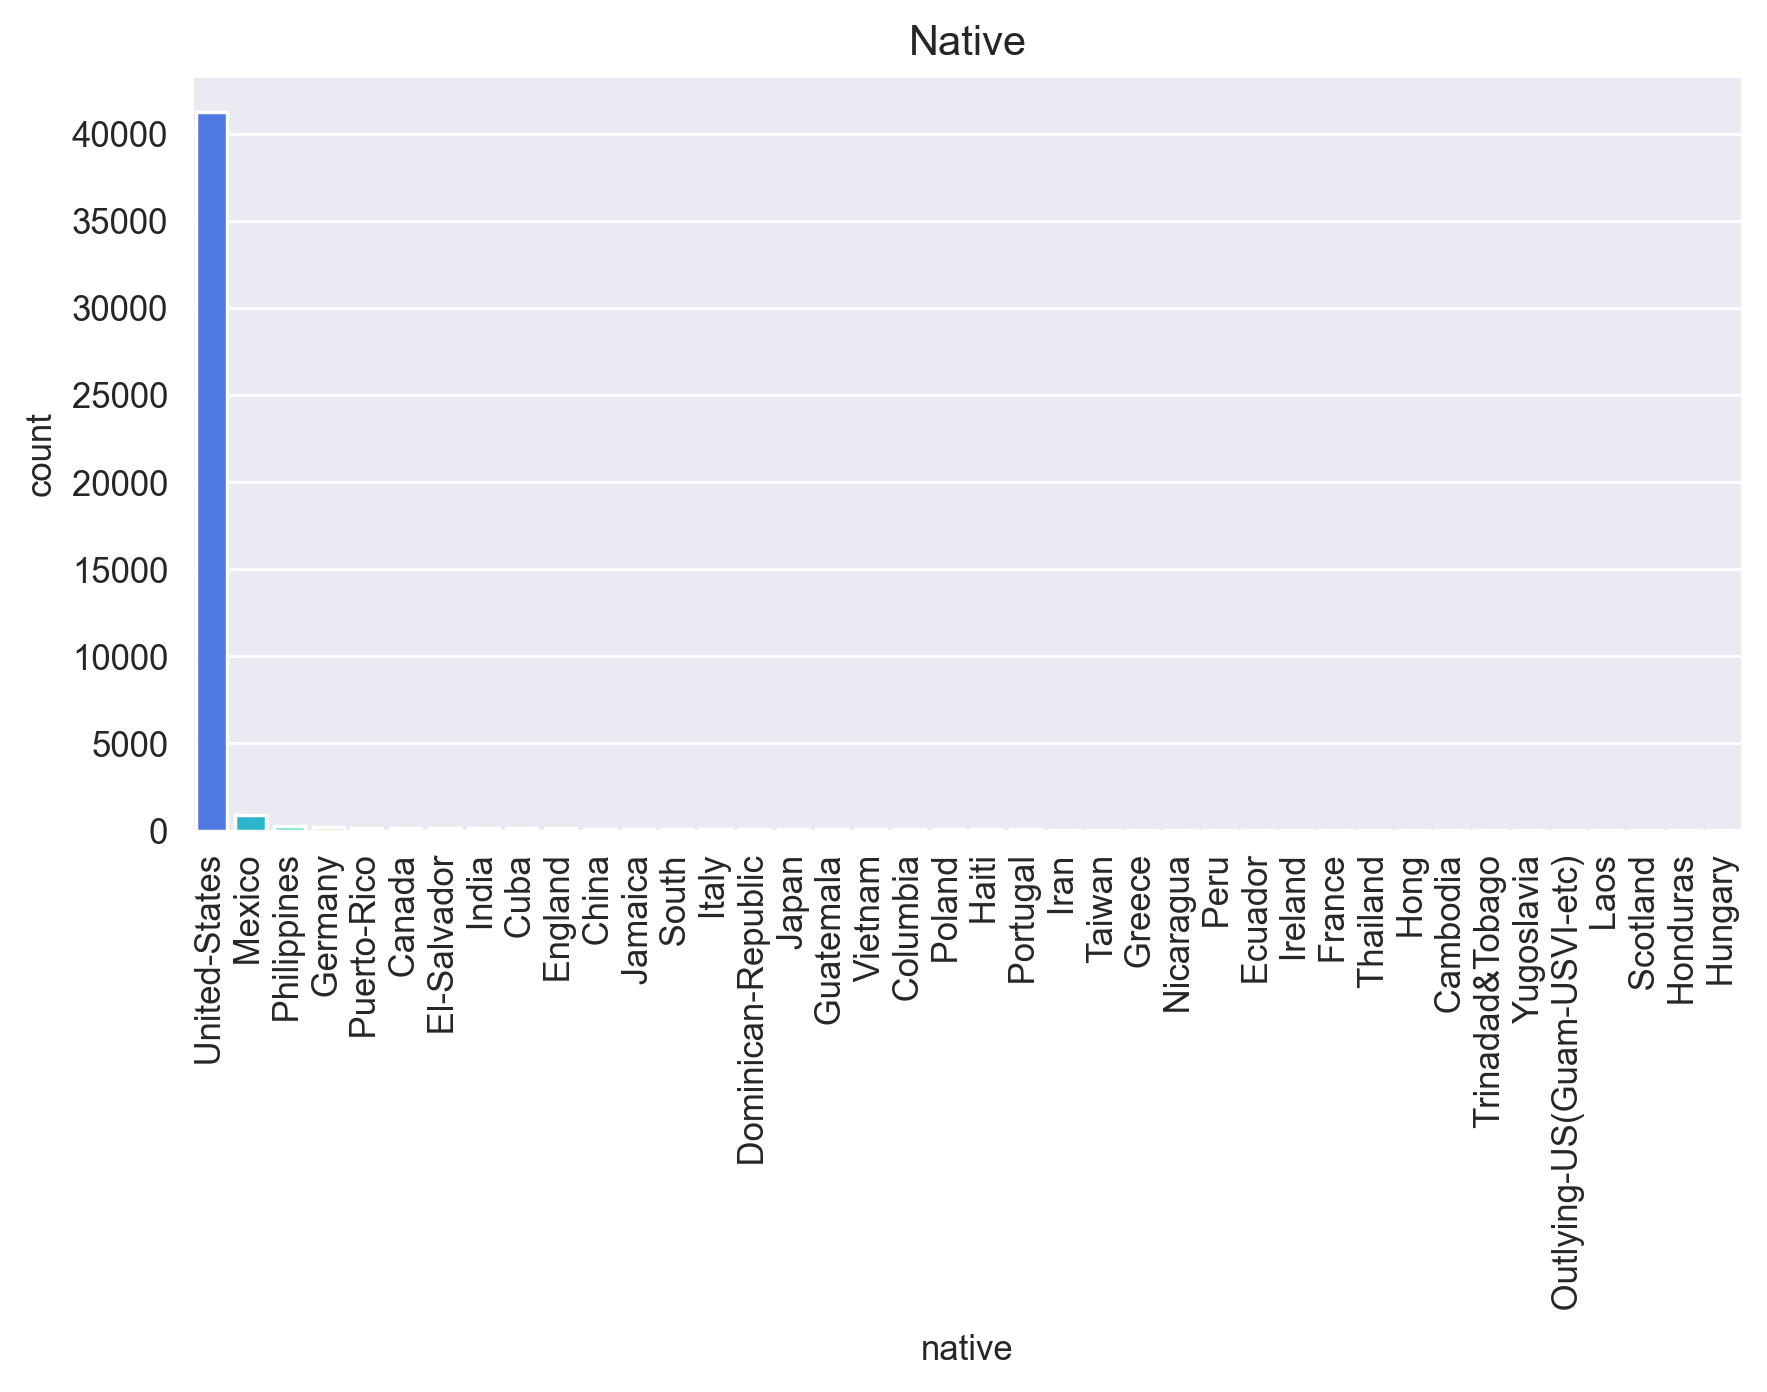

In [45]:
plt.figure(figsize=(8,4),dpi=250)
sns.countplot(x='native', data=S_TrainTest, palette = pal, 
              order=S_TrainTest['native'].value_counts().index)
plt.xticks(fontsize = 10,rotation=90)
plt.title('Native')

In [46]:
# Checking for Imbalanced or balanced dataset with regards to the Target

countlessthanfiftyk = len(S_TrainTest[S_TrainTest.Salary == ' <=50K'])
countgreatthanfiftyk = len(S_TrainTest[S_TrainTest.Salary == ' >50K'])
print("Percentage of Employees with Salary greater than 50k: {:.2f}%".format((countgreatthanfiftyk / 
                                                                              (len(S_TrainTest.Salary))*100)))
print("Percentage of Employees with Salary lesser than 50k: {:.2f}%".format((countlessthanfiftyk / 
                                                                             (len(S_TrainTest.Salary))*100)))

Percentage of Employees with Salary greater than 50k: 24.78%
Percentage of Employees with Salary lesser than 50k: 75.22%


In [47]:
S_TrainTest.Salary.value_counts()

 <=50K    34013
 >50K     11208
Name: Salary, dtype: int64

In [48]:
pal = sns.color_palette('rainbow')
sns.countplot(x='Salary', data= S_TrainTest, palette = pal, 
              order=S_TrainTest['Salary'].value_counts().index, );
plt.xticks(fontsize = 12)
plt.title('Salary')

Text(0.5, 1.0, 'Salary')

In [49]:
plt.figure(figsize = (12,8))
plt.pie(S_TrainTest['Salary'].value_counts(),
       labels=S_TrainTest.Salary.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

### Data Visualization


##### Bivariate Analysis

<AxesSubplot:>

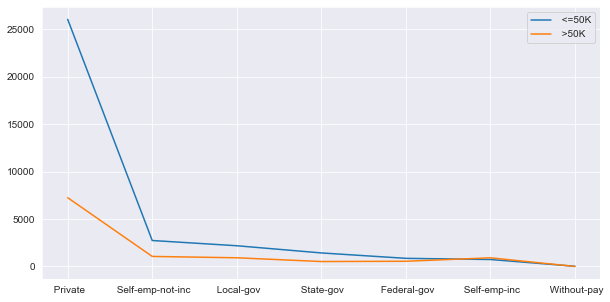

In [50]:
#workclass and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = S_TrainTest[S_TrainTest['Salary'] == ' <=50K']['workclass'].value_counts()
j_df[' >50K'] = S_TrainTest[S_TrainTest['Salary'] == ' >50K']['workclass'].value_counts()
j_df.plot.bar(title = 'Workclass and Salary',figsize=(10,5))
j_df.plot(figsize=(10,5))

In [51]:
fig= plt.figure(figsize=(15, 4))
sns.heatmap(pd.crosstab(index=S_TrainTest['workclass'], columns=S_TrainTest['Salary']), annot=True, fmt='g')

<AxesSubplot:xlabel='Salary', ylabel='workclass'>

<AxesSubplot:>

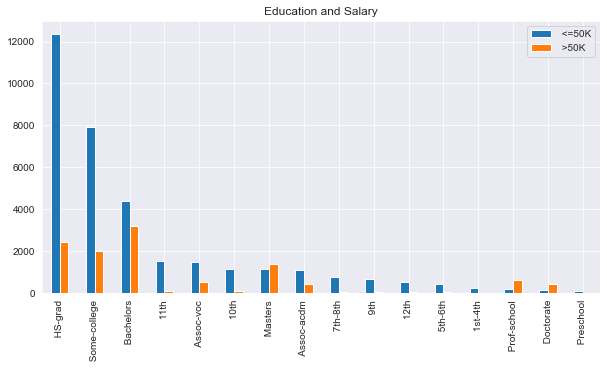

In [52]:
#Education and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = S_TrainTest[S_TrainTest['Salary'] == ' <=50K']['education'].value_counts()
j_df[' >50K'] = S_TrainTest[S_TrainTest['Salary'] == ' >50K']['education'].value_counts()
j_df.plot.bar(title = 'Education and Salary',figsize=(10,5))
j_df.plot(figsize=(10,5))

<AxesSubplot:xlabel='Salary', ylabel='education'>

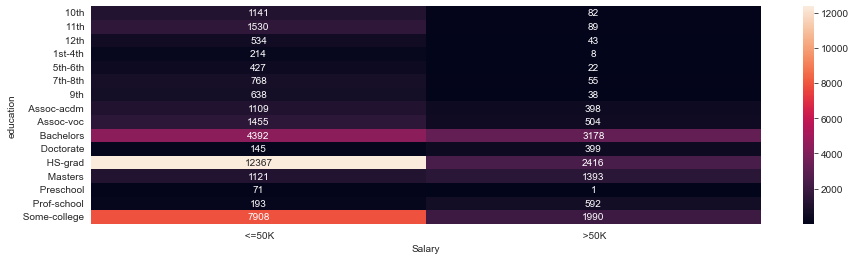

In [53]:
fig= plt.figure(figsize=(15, 4))
sns.heatmap(pd.crosstab(index=S_TrainTest['education'], columns=S_TrainTest['Salary']), annot=True, fmt='g')

In [54]:
#maritalstatus and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = S_TrainTest[S_TrainTest['Salary'] == ' <=50K']['maritalstatus'].value_counts()
j_df[' >50K'] = S_TrainTest[S_TrainTest['Salary'] == ' >50K']['maritalstatus'].value_counts()
j_df.plot.bar(title = 'Marital Status and Salary',figsize=(10,5))
j_df.plot(figsize=(10,5))

<AxesSubplot:>

In [55]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=S_TrainTest['maritalstatus'], columns=S_TrainTest['Salary']), annot=True, fmt='g')

<AxesSubplot:xlabel='Salary', ylabel='maritalstatus'>

<AxesSubplot:>

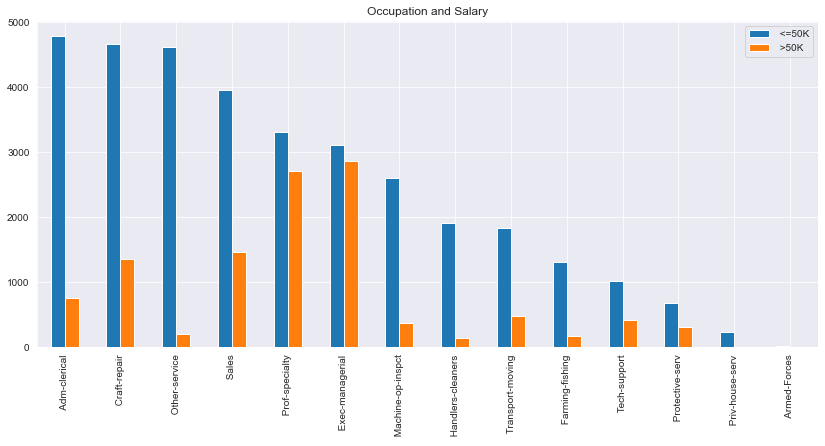

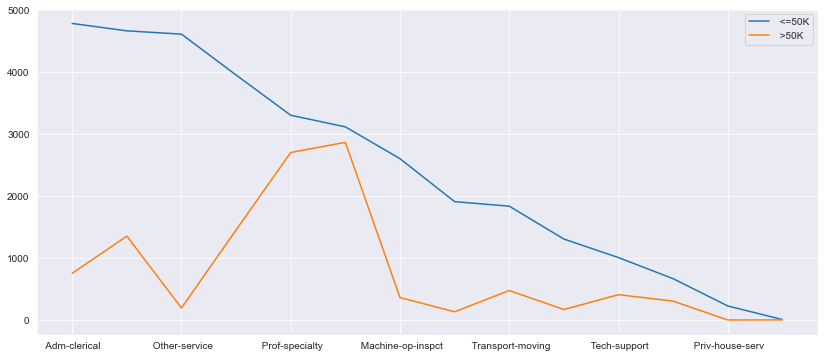

In [56]:
#occupation and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = S_TrainTest[S_TrainTest['Salary'] == ' <=50K']['occupation'].value_counts()
j_df[' >50K'] = S_TrainTest[S_TrainTest['Salary'] == ' >50K']['occupation'].value_counts()
j_df.plot.bar(title = 'Occupation and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<AxesSubplot:xlabel='Salary', ylabel='occupation'>

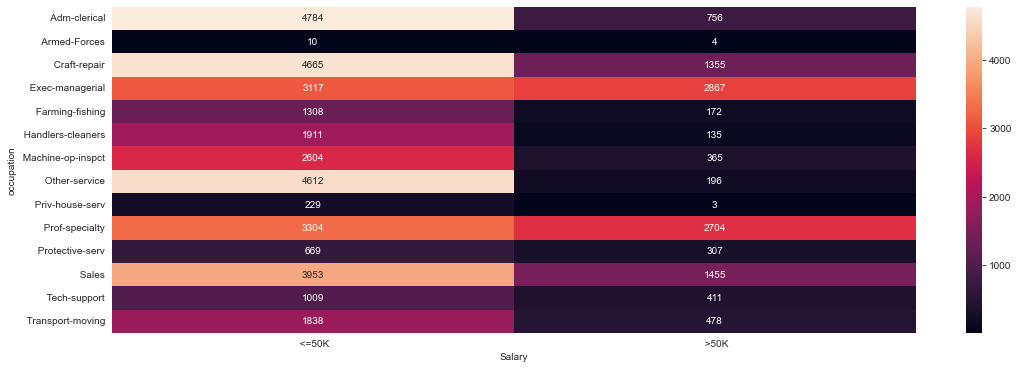

In [57]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(pd.crosstab(index=S_TrainTest['occupation'], columns=S_TrainTest['Salary']), annot=True, fmt='g')

<AxesSubplot:>

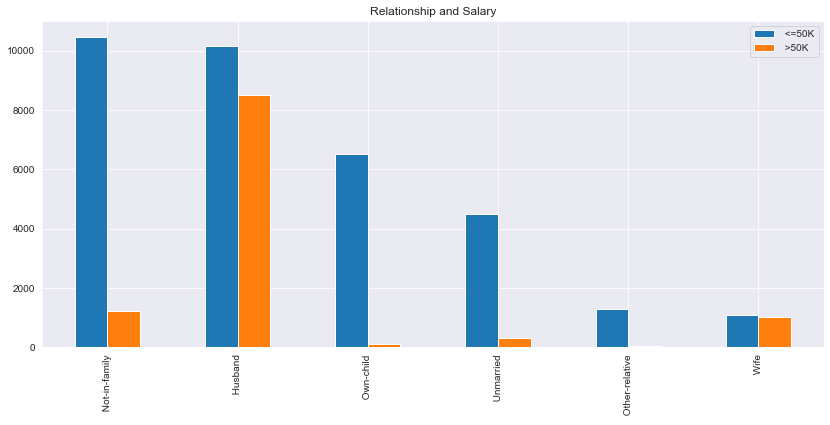

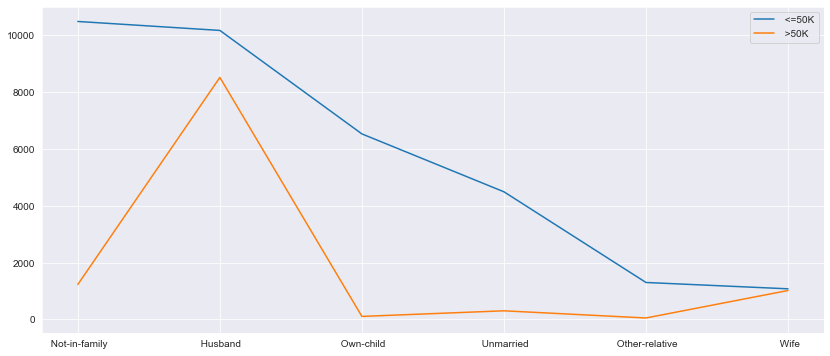

In [58]:
#relationship and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = S_TrainTest[S_TrainTest['Salary'] == ' <=50K']['relationship'].value_counts()
j_df[' >50K'] = S_TrainTest[S_TrainTest['Salary'] == ' >50K']['relationship'].value_counts()
j_df.plot.bar(title = 'Relationship and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<AxesSubplot:xlabel='Salary', ylabel='relationship'>

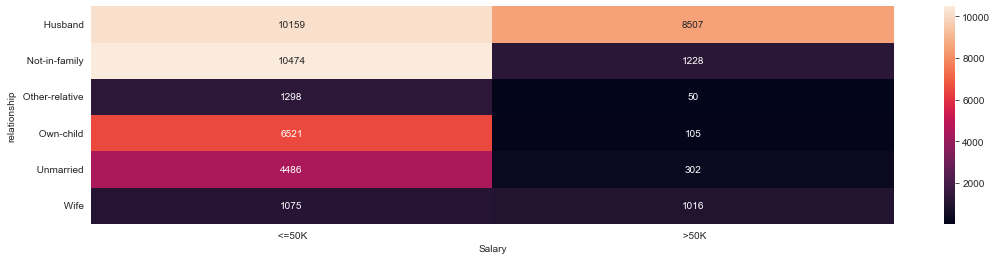

In [59]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=S_TrainTest['relationship'], columns=S_TrainTest['Salary']), annot=True, fmt='g')

<AxesSubplot:>

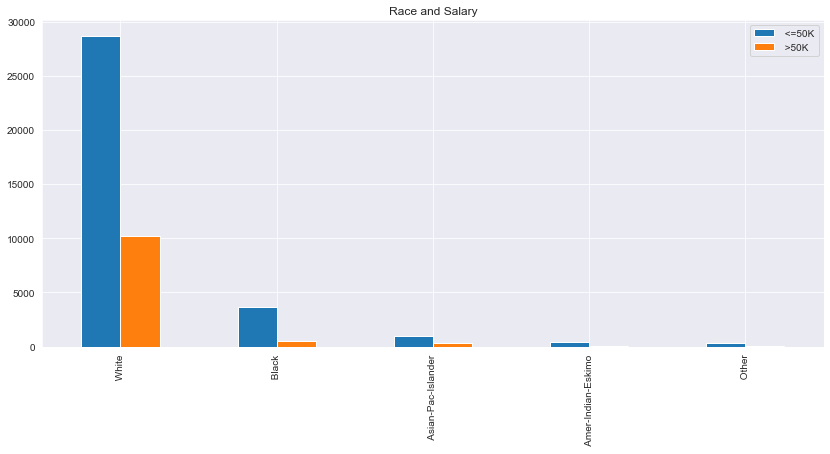

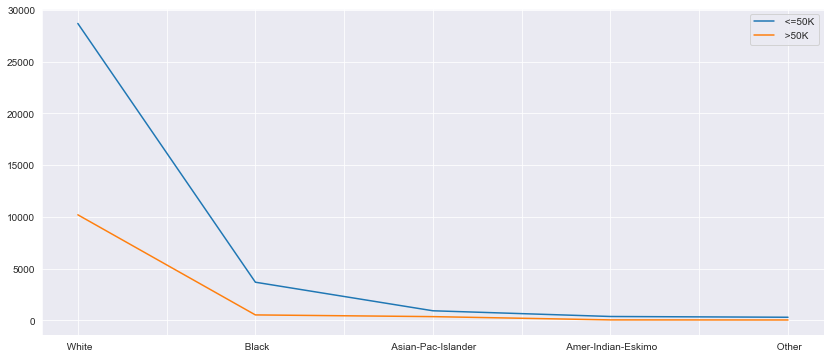

In [60]:
#Race and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = S_TrainTest[S_TrainTest['Salary'] == ' <=50K']['race'].value_counts()
j_df[' >50K'] = S_TrainTest[S_TrainTest['Salary'] == ' >50K']['race'].value_counts()
j_df.plot.bar(title = 'Race and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<AxesSubplot:xlabel='Salary', ylabel='race'>

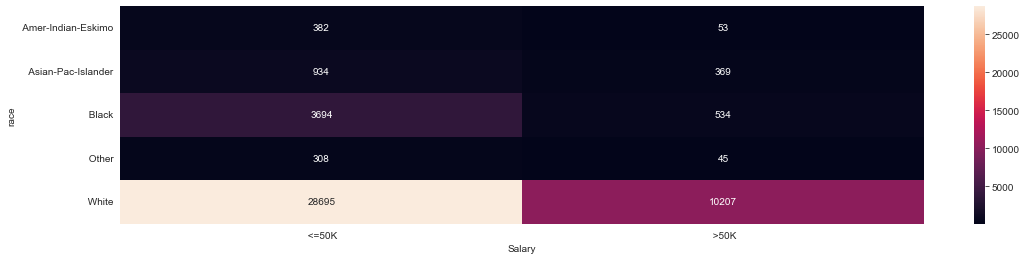

In [61]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=S_TrainTest['race'], columns=S_TrainTest['Salary']), annot=True, fmt='g')

<AxesSubplot:>

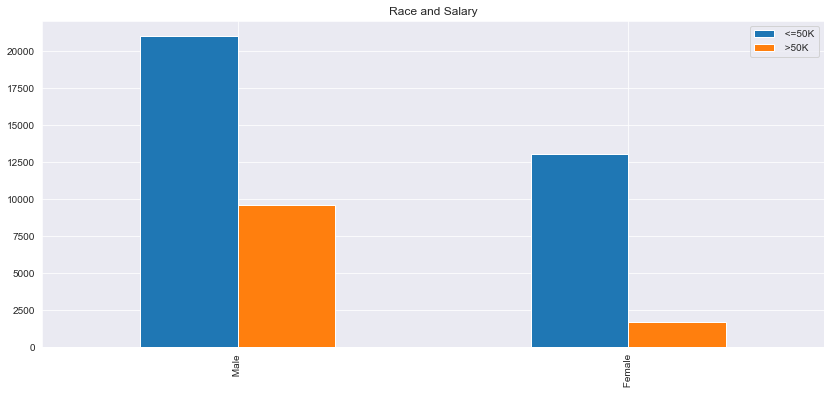

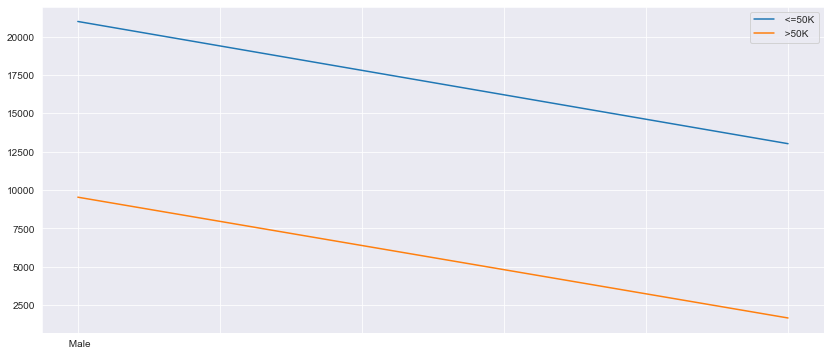

In [62]:
#Sex and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = S_TrainTest[S_TrainTest['Salary'] == ' <=50K']['sex'].value_counts()
j_df[' >50K'] = S_TrainTest[S_TrainTest['Salary'] == ' >50K']['sex'].value_counts()
j_df.plot.bar(title = 'Race and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<AxesSubplot:xlabel='Salary', ylabel='sex'>

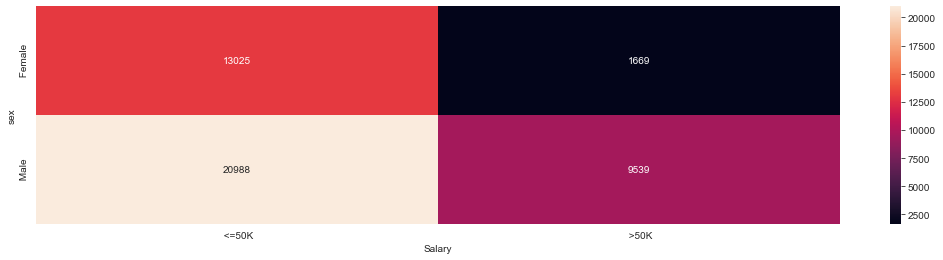

In [63]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=S_TrainTest['sex'], columns=S_TrainTest['Salary']), annot=True, fmt='g')

<AxesSubplot:>

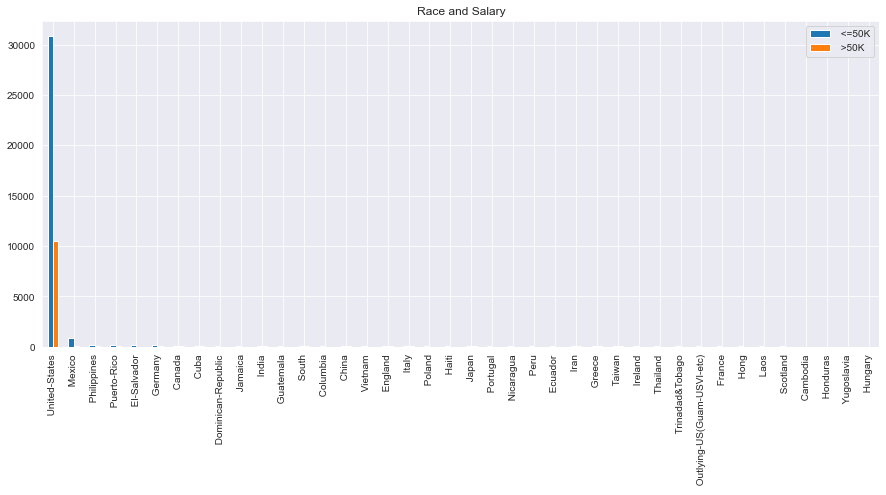

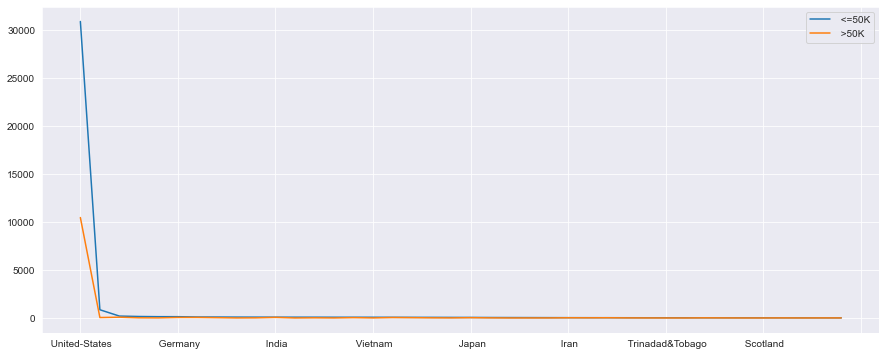

In [64]:
#Native and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = S_TrainTest[S_TrainTest['Salary'] == ' <=50K']['native'].value_counts()
j_df[' >50K'] = S_TrainTest[S_TrainTest['Salary'] == ' >50K']['native'].value_counts()
j_df.plot.bar(title = 'Race and Salary',figsize=(15,6))
j_df.plot(figsize=(15,6))

<AxesSubplot:xlabel='Salary', ylabel='native'>

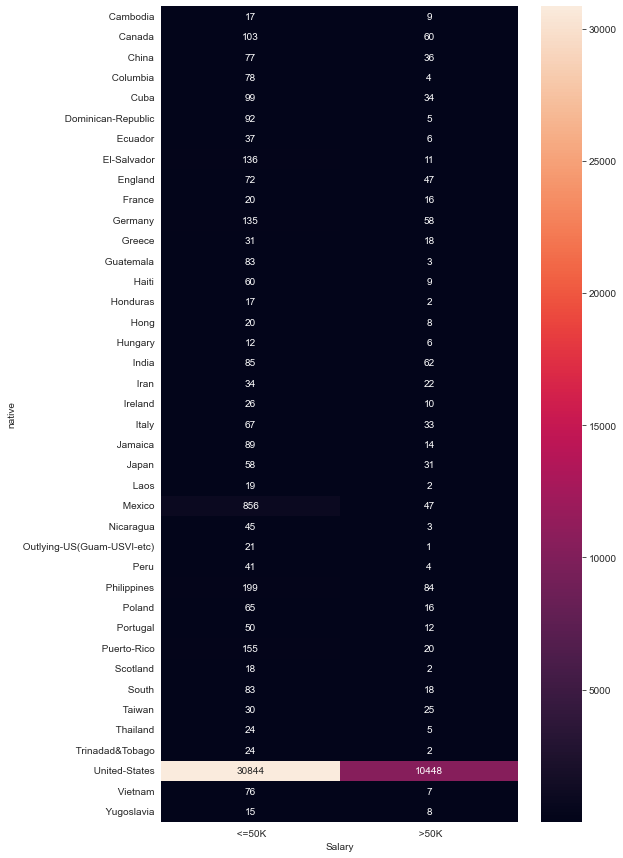

In [65]:
fig= plt.figure(figsize=(8, 15))
sns.heatmap(pd.crosstab(index=S_TrainTest['native'], columns=S_TrainTest['Salary']), annot=True, fmt='g')

### Analyzing Relation by plotting Continuous features with the Target Feature 

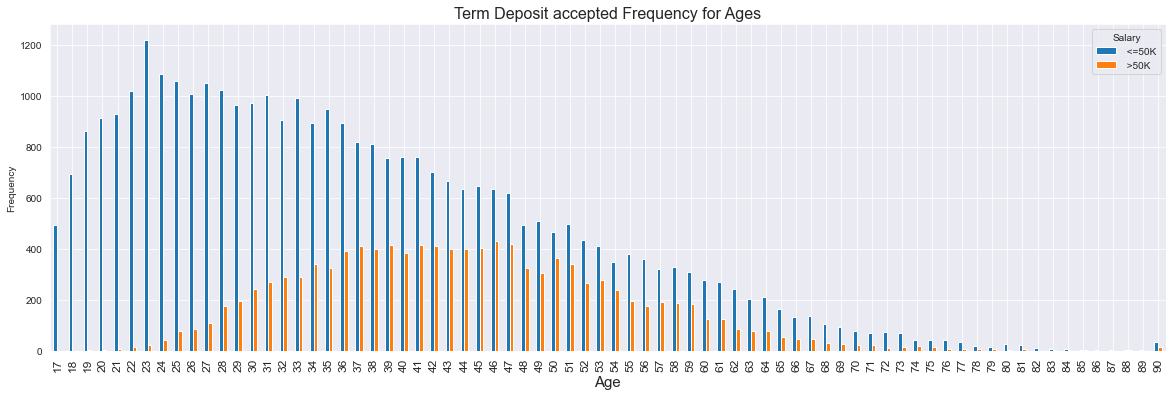

In [66]:
pd.crosstab(S_TrainTest.age,S_TrainTest.Salary).plot(kind="bar",figsize=(20,6))
plt.title('Term Deposit accepted Frequency for Ages', fontsize = 16)
plt.xticks(fontsize = 12)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency')
plt.show()

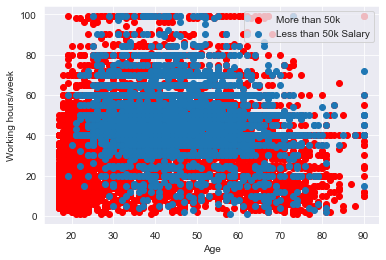

In [67]:
plt.scatter(x= S_TrainTest.age[S_TrainTest.Salary== ' <=50K'], y=S_TrainTest.hoursperweek[(S_TrainTest.Salary== ' <=50K')], 
            c="red")
plt.scatter(x= S_TrainTest.age[S_TrainTest.Salary== ' >50K'], y=S_TrainTest.hoursperweek[(S_TrainTest.Salary== ' >50K')])
plt.legend(["More than 50k", "Less than 50k Salary"])
plt.xlabel("Age")
plt.ylabel("Working hours/week")
plt.show()

#### Visualize the Salary rate by Workclass 

In [68]:
count_job_response_pct = pd.crosstab(S_TrainTest['Salary'],S_TrainTest['workclass']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct

workclass   Federal-gov   Local-gov    Private   Self-emp-inc  \
Salary                                                          
 <=50K        60.953058   70.483871  78.229148      44.592953   
 >50K         39.046942   29.516129  21.770852      55.407047   

workclass   Self-emp-not-inc   State-gov   Without-pay  
Salary                                                  
 <=50K             72.102213    73.27852      90.47619  
 >50K              27.897787    26.72148       9.52381

In [69]:
count_job_response_pct = count_job_response_pct.transpose()
count_job_response_pct

Salary                 <=50K       >50K
workclass                              
 Federal-gov       60.953058  39.046942
 Local-gov         70.483871  29.516129
 Private           78.229148  21.770852
 Self-emp-inc      44.592953  55.407047
 Self-emp-not-inc  72.102213  27.897787
 State-gov         73.278520  26.721480
 Without-pay       90.476190   9.523810

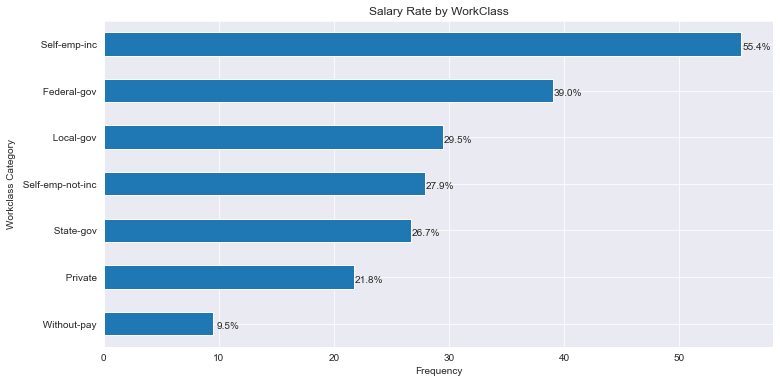

In [70]:
plot_job = count_job_response_pct[' >50K'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))
                                                                               
plt.title('Salary Rate by WorkClass')
plt.xlabel('Frequency')
plt.ylabel('Workclass Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct[' >50K'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+1.3, 
                  rec.get_y()+ rec.get_height()-0.4, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')


#### Visualize the Salary rate by Education 

In [71]:
count_job_response_pct = pd.crosstab(S_TrainTest['Salary'],S_TrainTest['education']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct

education       10th       11th      12th    1st-4th    5th-6th    7th-8th  \
Salary                                                                       
 <=50K     93.295176  94.502779  92.54766  96.396396  95.100223  93.317132   
 >50K       6.704824   5.497221   7.45234   3.603604   4.899777   6.682868   

education        9th   Assoc-acdm   Assoc-voc   Bachelors   Doctorate  \
Salary                                                                  
 <=50K     94.378698    73.589914   74.272588   58.018494   26.654412   
 >50K       5.621302    26.410086   25.727412   41.981506   73.345588   

education    HS-grad    Masters   Preschool   Prof-school   Some-college  
Salary                                                                    
 <=50K     83.656903  44.590294   98.611111     24.585987      79.894928  
 >50K      16.343097  55.409706    1.388889     75.414013      20.105072

In [72]:
count_job_response_pct = count_job_response_pct.transpose()
count_job_response_pct

Salary             <=50K       >50K
education                          
 10th          93.295176   6.704824
 11th          94.502779   5.497221
 12th          92.547660   7.452340
 1st-4th       96.396396   3.603604
 5th-6th       95.100223   4.899777
 7th-8th       93.317132   6.682868
 9th           94.378698   5.621302
 Assoc-acdm    73.589914  26.410086
 Assoc-voc     74.272588  25.727412
 Bachelors     58.018494  41.981506
 Doctorate     26.654412  73.345588
 HS-grad       83.656903  16.343097
 Masters       44.590294  55.409706
 Preschool     98.611111   1.388889
 Prof-school   24.585987  75.414013
 Some-college  79.894928  20.105072

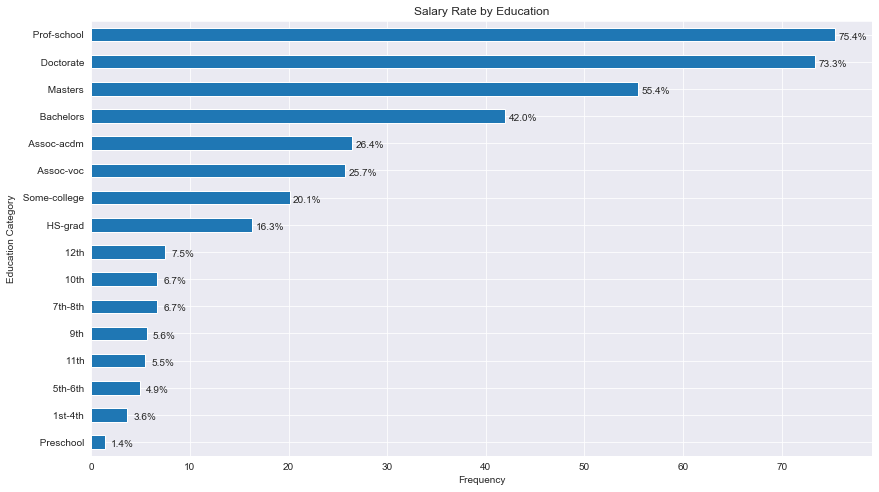

In [73]:
plot_job = count_job_response_pct[' >50K'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (14,8))
                                                                               
plt.title('Salary Rate by Education')
plt.xlabel('Frequency')
plt.ylabel('Education Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct[' >50K'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+1.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

### Data Pre-Processing 


### Label Encoding Technique

In [74]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
df2= S_TrainTest.copy()
label_encoder = preprocessing.LabelEncoder()
df2["education"]=label_encoder.fit_transform(df2["education"])
df2["workclass"]=label_encoder.fit_transform(df2["workclass"])
df2["maritalstatus"]=label_encoder.fit_transform(df2["maritalstatus"])
df2["sex"]=label_encoder.fit_transform(df2["sex"])
df2["race"]=label_encoder.fit_transform(df2["race"])
df2["occupation"]=label_encoder.fit_transform(df2["occupation"])
df2["relationship"]=label_encoder.fit_transform(df2["relationship"])
df2["native"]=label_encoder.fit_transform(df2["native"])
df2.head(10)

age  workclass  education  educationno  maritalstatus  occupation  \
0   39          5          9           13              4           0   
1   50          4          9           13              2           3   
2   38          2         11            9              0           5   
3   53          2          1            7              2           5   
4   28          2          9           13              2           9   
5   37          2         12           14              2           3   
6   49          2          6            5              3           7   
7   52          4         11            9              2           3   
8   31          2         12           14              4           9   
9   42          2          9           13              2           3   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1         2174            0            40      37   
1             0     4    1            0            0            13      37   
2             1     4    1            0            0            40      37   
3             0     2    1            0            0            40      37   
4             5     2    0            0            0            40       4   
5             5     4    0            0            0            40      37   
6             1     2    0            0            0            16      21   
7             0     4    1            0            0            45      37   
8             1     4    0        14084            0            50      37   
9             0     4    1         5178            0            40      37   

   Salary  
0   <=50K  
1   <=50K  
2   <=50K  
3   <=50K  
4   <=50K  
5   <=50K  
6   <=50K  
7    >50K  
8    >50K  
9    >50K

In [75]:
# Converting string value into binary classes such as if ">50K" than classify it as '1' else 'O'

df2['Salary'] = S_TrainTest.Salary
df2['Salary'] = np.where(df2['Salary'].str.contains(" >50K"), 1, 0)
df2.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   39          5          9           13              4           0   
1   50          4          9           13              2           3   
2   38          2         11            9              0           5   
3   53          2          1            7              2           5   
4   28          2          9           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1         2174            0            40      37   
1             0     4    1            0            0            13      37   
2             1     4    1            0            0            40      37   
3             0     2    1            0            0            40      37   
4             5     2    0            0            0            40       4   

   Salary  
0       0  
1       0  
2       0  
3       0  
4       0

In [76]:
df2[continuous_feature]

age  capitalgain  capitalloss  hoursperweek
0       39         2174            0            40
1       50            0            0            13
2       38            0            0            40
3       53            0            0            40
4       28            0            0            40
...    ...          ...          ...           ...
45216   33            0            0            40
45217   39            0            0            36
45218   38            0            0            50
45219   44         5455            0            40
45220   35            0            0            60

[45221 rows x 4 columns]

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = df2[continuous_feature]
df2[continuous_feature] = scaler.fit_transform(features.values)
df2.head()


age  workclass  education  educationno  maritalstatus  occupation  \
0  0.034190          5          9           13              4           0   
1  0.866399          4          9           13              2           3   
2 -0.041466          2         11            9              0           5   
3  1.093365          2          1            7              2           5   
4 -0.798019          2          9           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1     0.142884    -0.218728     -0.078121      37   
1             0     4    1    -0.146735    -0.218728     -2.326714      37   
2             1     4    1    -0.146735    -0.218728     -0.078121      37   
3             0     2    1    -0.146735    -0.218728     -0.078121      37   
4             5     2    0    -0.146735    -0.218728     -0.078121       4   

   Salary  
0       0  
1       0  
2       0  
3       0  
4       0

## Test Train Split 

In [78]:
x = df2.drop('Salary',axis=1)
y = df2['Salary']

In [79]:
y.unique()

array([0, 1])

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [81]:
# summarize train and test composition
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({0: 23809, 1: 7845}) Testing Data Counter({0: 10204, 1: 3363})


In [82]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (31654, 13)
Shape of X_test:  (13567, 13)
Shape of y_train:  (31654,)
Shape of y_test (13567,)


### Grid search using Train Test Splits Stratifying Target feature 

In [83]:
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### Run SVM with default hyperparameters 

In [84]:
rf_clf = SVC()
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 81.44%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.814471     0.813435  0.814368      0.813953      0.814214
recall         0.975387     0.325685  0.814368      0.650536      0.814368
f1-score       0.887695     0.465137  0.814368      0.676416      0.782970
support    23809.000000  7845.000000  0.814368  31654.000000  31654.000000
_______________________________________________
Confusion Matrix: 
 [[23223   586]
 [ 5290  2555]]

Test Result:
Accuracy Score: 81.51%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.815395     0.812135  0.815066      0.813765      0.814587
recall         0.974814     0.330360  0.815066      0.652587      0.815066
f1-score       0.888006     0.469668  0.815066      0.678837      0.784308
support   

### Kernel trick


#### Sklearn Support Vector Classifier Using Linear Kernel

In [85]:
# initiating the model
model = SVC(kernel='linear', probability=True)

# fit the model
model.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

In [86]:
#Predictions
y_pred = model.predict(x_test)

print('SVC Model using Linear Kernel accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

SVC Model using Linear Kernel accuracy score: 0.8083


### Classification Report 

In [87]:
# print the classification report

print('SVM Linear Kernel Model','\n',report(y_test, y_pred))

SVM Linear Kernel Model 
               precision    recall  f1-score   support

           0       0.81      0.97      0.88     10204
           1       0.79      0.31      0.45      3363

    accuracy                           0.81     13567
   macro avg       0.80      0.64      0.66     13567
weighted avg       0.80      0.81      0.78     13567



### Compare the train-set and test-set accuracy 

In [88]:
# print the scores on training and test set

print('Training set score: {:.2f}%'.format(model.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(model.score(x_test, y_test)*100))

Training set score: 80.88%
Test set score: 80.83%


### Confusion matrix 

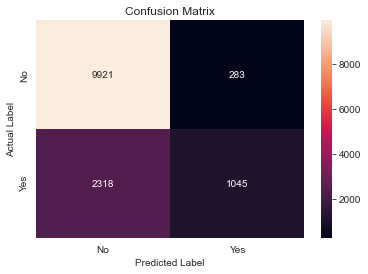

In [89]:
# plot confusion matrix to describe the performance of classifier.

cm_df = cm(y_test, y_pred)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

### ROC - AUC 

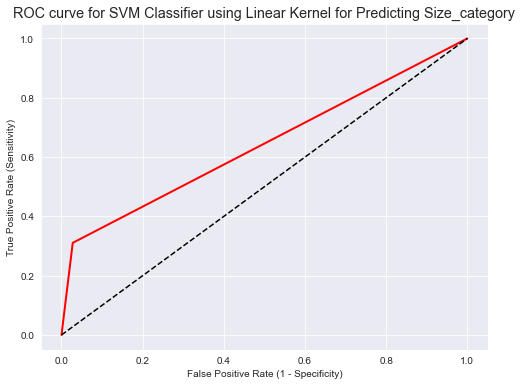

ROC AUC : 0.6415


In [90]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(8,6))

plt.plot(fpr, tpr, linewidth=2, color='red')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for SVM Classifier using Linear Kernel for Predicting Size_category')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

Text(0, 0.5, 'Frequency')

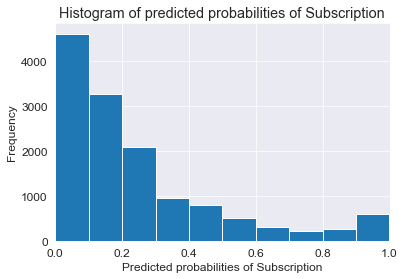

In [91]:
# store the predicted probabilities for class 1 - Probability of Subscription

y_pred1 = model.predict_proba(x_test)[:, 1]
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Subscription')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Subscription')
plt.ylabel('Frequency')

### ROC AUC Score 

In [92]:
from sklearn.metrics import roc_auc_score
curve = roc_auc_score(y_test, y_pred)
print(curve)

0.6415001207015306


### Polynomial Kernel 

In [93]:
# initiating the model
model = SVC(kernel='poly', probability=True)

# fit the model
model.fit(x_train, y_train)

SVC(kernel='poly', probability=True)

In [94]:
#Predictions
y_pred = model.predict(x_test)

print('SVC Model using Linear Kernel accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

SVC Model using Linear Kernel accuracy score: 0.8187


In [95]:
# print the classification report

print('SVM Linear Kernel Model','\n',report(y_test, y_pred))

SVM Linear Kernel Model 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89     10204
           1       0.81      0.35      0.49      3363

    accuracy                           0.82     13567
   macro avg       0.81      0.66      0.69     13567
weighted avg       0.82      0.82      0.79     13567



In [96]:
# Check for overfitting and underfitting

# print the scores on training and test set

print('Training set score: {:.2f}%'.format(model.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(model.score(x_test, y_test)*100))

Training set score: 81.93%
Test set score: 81.87%


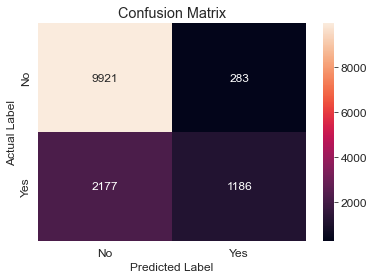

In [97]:
# plot confusion matrix to describe the performance of classifier.

cm_df=cm(y_test, y_pred)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

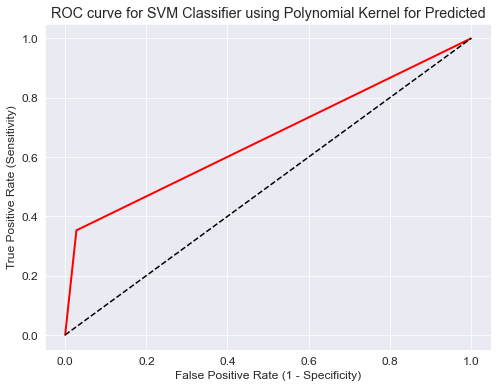

ROC AUC : 0.6625


In [98]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(8,6))

plt.plot(fpr, tpr, linewidth=2, color='red')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for SVM Classifier using Polynomial Kernel for Predicted')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

Text(0.5, 0, 'Predicted probabilities of Subscription')

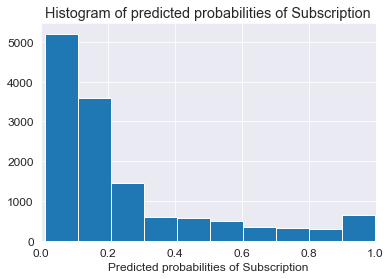

In [99]:
# store the predicted probabilities for class 1 - Probability of Subscription

y_pred1 = model.predict_proba(x_test)[:, 1]
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Subscription')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Subscription')

In [100]:
from sklearn.metrics import roc_auc_score
curve = roc_auc_score(y_test, y_pred)
print(curve)

0.6624635462144655


#### Radial Basis Function Kernel 

In [101]:
# initiating the model
model = SVC(kernel='rbf', probability=True)

# fit the model
model.fit(x_train, y_train)

SVC(probability=True)

In [102]:
#Predictions
y_pred = model.predict(x_test)

print('SVC Model using Linear Kernel accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

SVC Model using Linear Kernel accuracy score: 0.8151


In [103]:
# print the classification report

print('SVM Linear Kernel Model','\n',report(y_test, y_pred))

SVM Linear Kernel Model 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89     10204
           1       0.81      0.33      0.47      3363

    accuracy                           0.82     13567
   macro avg       0.81      0.65      0.68     13567
weighted avg       0.81      0.82      0.78     13567



In [105]:
# print the scores on training and test set

print('Training set score: {:.2f}%'.format(model.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(model.score(x_test, y_test)*100))

Training set score: 81.44%
Test set score: 81.51%


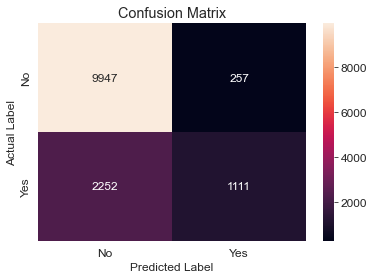

In [106]:
# plot confusion matrix to describe the performance of classifier.

cm_df=cm(y_test, y_pred)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

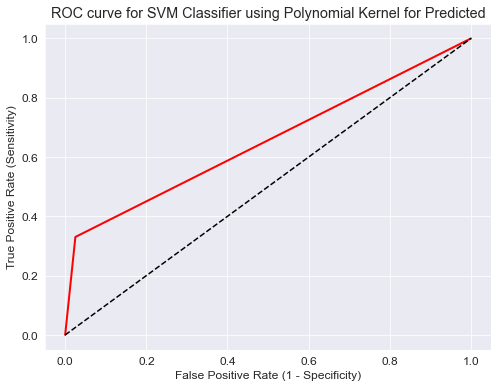

ROC AUC : 0.6526


In [107]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(8,6))

plt.plot(fpr, tpr, linewidth=2, color='red')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for SVM Classifier using Polynomial Kernel for Predicted')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

Text(0, 0.5, 'Frequency')

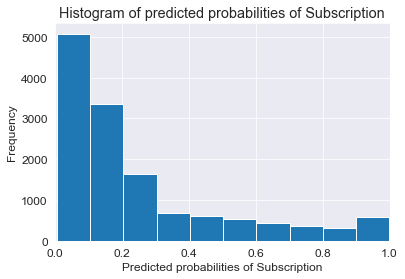

In [108]:
# store the predicted probabilities for class 1 - Probability of Subscription

y_pred1 = model.predict_proba(x_test)[:, 1]
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Subscription')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Subscription')
plt.ylabel('Frequency')

In [109]:
from sklearn.metrics import roc_auc_score
curve = roc_auc_score(y_test, y_pred)
print(curve)

0.6525867981549859


### Sigmoid kernel

In [110]:
# initiating the model
model = SVC(kernel='sigmoid', probability=True)

# fit the model
model.fit(x_train, y_train)

SVC(kernel='sigmoid', probability=True)

In [111]:
#Predictions
y_pred = model.predict(x_test)

print('SVC Model using Linear Kernel accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

SVC Model using Linear Kernel accuracy score: 0.7831


In [112]:
# print the classification report

print('SVM Linear Kernel Model','\n',report(y_test, y_pred))

SVM Linear Kernel Model 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86     10204
           1       0.58      0.47      0.52      3363

    accuracy                           0.78     13567
   macro avg       0.71      0.68      0.69     13567
weighted avg       0.77      0.78      0.78     13567



In [113]:
# print the scores on training and test set

print('Training set score: {:.2f}%'.format(model.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(model.score(x_test, y_test)*100))

Training set score: 78.31%
Test set score: 78.31%


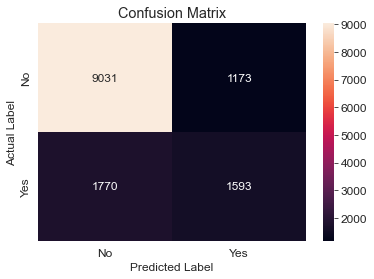

In [114]:
# plot confusion matrix to describe the performance of classifier.

cm_df=cm(y_test, y_pred)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

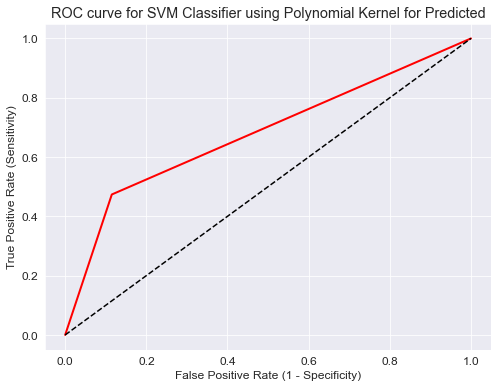

ROC AUC : 0.6794


In [115]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(8,6))

plt.plot(fpr, tpr, linewidth=2, color='red')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for SVM Classifier using Polynomial Kernel for Predicted')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

Text(0, 0.5, 'Frequency')

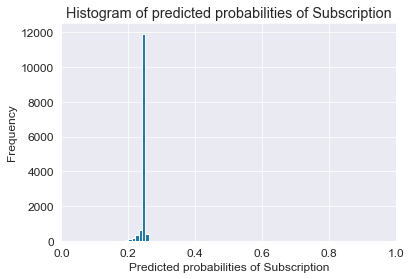

In [116]:
# store the predicted probabilities for class 1 - Probability of Subscription

y_pred1 = model.predict_proba(x_test)[:, 1]
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Subscription')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Subscription')
plt.ylabel('Frequency')

In [117]:
from sklearn.metrics import roc_auc_score
curve = roc_auc_score(y_test, y_pred)
print(curve)

0.6793646454434793
